In [1]:
import pandas as pd
data=pd.read_csv("DATA.csv")
data

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,NaN,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,NaN,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


In [2]:
# CHECKING  NO OF MISSING VALUES IN EACH COLUMN
data.isnull().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [3]:
# DISTRIBUTION  OF Positive cases and negative cases 
data['MonkeyPox'].value_counts()

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

In [4]:
print('Percentage of No Positive cases: {}%'.format(round(data.MonkeyPox.value_counts()['Positive']/len(data) * 100.0,2)))
print('Percentage of Negative cases: {}%'.format(round(data.MonkeyPox.value_counts()['Negative']/len(data) * 100.0,2)))

Percentage of No Positive cases: 63.64%
Percentage of Negative cases: 36.36%


In [5]:
#Unique values present in every column  
for col in data.columns:
    unique_values=data[col].unique()
    print(f"UNIQUE VALUES IN A COLUMN'{col}':{unique_values}'")
    print()

UNIQUE VALUES IN A COLUMN'Patient_ID':['P0' 'P1' 'P2' ... 'P24997' 'P24998' 'P24999']'

UNIQUE VALUES IN A COLUMN'Systemic Illness':[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']'

UNIQUE VALUES IN A COLUMN'Rectal Pain':[False  True]'

UNIQUE VALUES IN A COLUMN'Sore Throat':[ True False]'

UNIQUE VALUES IN A COLUMN'Penile Oedema':[ True False]'

UNIQUE VALUES IN A COLUMN'Oral Lesions':[ True False]'

UNIQUE VALUES IN A COLUMN'Solitary Lesion':[False  True]'

UNIQUE VALUES IN A COLUMN'Swollen Tonsils':[ True False]'

UNIQUE VALUES IN A COLUMN'HIV Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'Sexually Transmitted Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'MonkeyPox':['Negative' 'Positive']'



In [6]:
#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_16656\270484086.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [7]:
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

C:\Users\pulip\AppData\Local\Temp\ipykernel_16656\2458704213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})


In [8]:
import pandas as pd

# Fill missing values with a specific value
data['Systemic Illness'].fillna('Unknown', inplace=True)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Systemic Illness'])

# Print the first few rows of the preprocessed data
print(data.head())

  Patient_ID  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0         P0            0            1              1             1   
1         P1            1            0              1             1   
2         P2            0            1              1             0   
3         P3            1            0              0             0   
4         P4            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  Systemic Illness_Fever  \
0                               0          0                   False   
1                               0          1                    True   
2                               

C:\Users\pulip\AppData\Local\Temp\ipykernel_16656\1155651068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Systemic Illness'].fillna('Unknown', inplace=True)


In [9]:
#Converting the text into numerical of all the columns 
features=["Systemic Illness_Fever","Systemic Illness_Muscle Aches and Pain", "Systemic Illness_Swollen Lymph Nodes","Systemic Illness_Unknown"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_16656\3163387298.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [10]:
data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)

In [11]:
data

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,3,1,0,0,0,1,1,1,0,1,0,0,0,1
4,4,1,1,1,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,1,1,0,1,1,0,0,1,1,0,0,0,1
24996,24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,24997,1,1,0,0,1,1,0,0,1,0,0,0,1
24998,24998,0,1,0,1,1,1,0,0,0,0,0,1,0


In [12]:
print(data.dtypes)

Patient_ID                                int32
Rectal Pain                               int64
Sore Throat                               int64
Penile Oedema                             int64
Oral Lesions                              int64
Solitary Lesion                           int64
Swollen Tonsils                           int64
HIV Infection                             int64
Sexually Transmitted Infection            int64
MonkeyPox                                 int64
Systemic Illness_Fever                    int64
Systemic Illness_Muscle Aches and Pain    int64
Systemic Illness_Swollen Lymph Nodes      int64
Systemic Illness_Unknown                  int64
dtype: object


In [13]:
print(data.columns)
print("Total Number of Columns :",len(data.columns))

Index(['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox', 'Systemic Illness_Fever',
       'Systemic Illness_Muscle Aches and Pain',
       'Systemic Illness_Swollen Lymph Nodes', 'Systemic Illness_Unknown'],
      dtype='object')
Total Number of Columns : 14


In [14]:
print(data.columns)
print("Total Number of Columns :",len(data.columns))

Index(['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox', 'Systemic Illness_Fever',
       'Systemic Illness_Muscle Aches and Pain',
       'Systemic Illness_Swollen Lymph Nodes', 'Systemic Illness_Unknown'],
      dtype='object')
Total Number of Columns : 14


# Feature Section Using  Lightgbm

# Filter Methods (LG)

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import warnings

# Handle import warnings (optional)
warnings.filterwarnings("ignore", message=".*deprecated.*")  # Ignore deprecation warnings

X = data.drop('MonkeyPox', axis=1)  # Replace 'target_column' with your target variable
y = data['MonkeyPox']

mutual_info_selector=SelectKBest(mutual_info_classif, k=6)
mutual_info_X_kbest = mutual_info_selector.fit_transform(X, y)
mutual_info_selected_features = X.columns[mutual_info_selector.get_support()].tolist()
mutual_info_X_train, mutual_info_X_test, mutual_info_y_train, mutual_info_y_test = train_test_split(mutual_info_X_kbest, y, test_size=0.2, random_state=42)

mutual_info_model = lgb.LGBMClassifier()
mutual_info_model.fit(mutual_info_X_train, mutual_info_y_train)
mutual_info_y_pred = mutual_info_model.predict(mutual_info_X_test)
mutual_info_y_pred_proba = mutual_info_model.predict_proba(mutual_info_X_test)[:, 1]

# Calculate performance metrics
mutual_info_accuracy = accuracy_score(mutual_info_y_test, mutual_info_y_pred)
mutual_info_precision = precision_score(mutual_info_y_test, mutual_info_y_pred)
mutual_info_recall = recall_score(mutual_info_y_test, mutual_info_y_pred)
mutual_info_f1 = f1_score(mutual_info_y_test, mutual_info_y_pred)
mutual_info_roc_auc = roc_auc_score(mutual_info_y_test, mutual_info_y_pred_proba)

# Calculate confusion matrix for specificity calculation
mutual_tn, mutual_fp, fmutual_n, mutual_tp = confusion_matrix(mutual_info_y_test, mutual_info_y_pred).ravel()
mutual_info_specificity = mutual_tn / (mutual_tn + mutual_fp) if (mutual_tn + mutual_fp) > 0 else 0

# Print performance metrics
# Print selected feature names
mutual_info_selected_features = X.columns[mutual_info_selector.get_support()]
print("Number of Selected Features:", len(mutual_info_selected_features))
print("Selected Features:", mutual_info_selected_features.tolist())
print(f"Accuracy: {mutual_info_accuracy:.2%}")
print(f"Precision: {mutual_info_precision:.2%}")
print(f"Recall: {mutual_info_recall:.2%}")
print(f"F1 Score: {mutual_info_f1:.2%}")
print(f"AUC-ROC Score: {mutual_info_roc_auc:.2%}")
print(f"Specificity: {mutual_info_specificity:.2%}")

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
Number of Selected Features: 6
Selected Features: ['Rectal Pain', 'Sore Throat', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Unknown']
Accuracy: 68.02%
Precision: 70.01%
Recall: 88.76%
F1 Score: 78.28%
AUC-ROC Score: 67.11%
Specificity: 29.65%


# CHI2 TEST 

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import warnings

# Handle import warnings (optional)
warnings.filterwarnings("ignore", message=".*deprecated.*")  # Ignore deprecation warnings

X = data.drop('MonkeyPox', axis=1)  # Replace 'target_column' with your target variable
y = data['MonkeyPox']

chi2_selector=SelectKBest(chi2, k=11)
chi2_X_kbest = chi2_selector.fit_transform(X, y)
chi2_selected_features = X.columns[chi2_selector.get_support()].tolist()
chi2_X_train, chi2_X_test, chi2_y_train,chi2_y_test = train_test_split(chi2_X_kbest, y, test_size=0.2, random_state=42)

chi2_model = lgb.LGBMClassifier()
chi2_model.fit(chi2_X_train, chi2_y_train)
chi2_y_pred = chi2_model.predict(chi2_X_test)
chi2_y_pred_proba = chi2_model.predict_proba(chi2_X_test)[:, 1]

# Calculate performance metrics
chi2_accuracy = accuracy_score(chi2_y_test, chi2_y_pred)
chi2_precision = precision_score(chi2_y_test, chi2_y_pred)
chi2_recall = recall_score(chi2_y_test, chi2_y_pred)
chi2_f1 = f1_score(chi2_y_test, chi2_y_pred)
chi2_roc_auc = roc_auc_score(chi2_y_test, chi2_y_pred_proba)

# Calculate confusion matrix for specificity calculation
chi2_tn,chi2_fp, chi2_fn, mutual_tp = confusion_matrix(chi2_y_test, chi2_y_pred).ravel()
chi2_specificity = chi2_tn / (chi2_tn +chi2_fp) if (chi2_tn + chi2_fp) > 0 else 0

# Print performance metrics
# Print selected feature names
chi2_selected_features = X.columns[chi2_selector.get_support()]
print("Number of Selected Features:", len(chi2_selected_features))
print("Selected Features:", chi2_selected_features.tolist())
print(f"Accuracy: {chi2_accuracy:.2%}")
print(f"Precision: {chi2_precision:.2%}")
print(f"Recall: {chi2_recall:.2%}")
print(f"F1 Score: {chi2_f1:.2%}")
print(f"AUC-ROC Score: {chi2_roc_auc:.2%}")
print(f"Specificity: {chi2_specificity:.2%}")


[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
Number of Selected Features: 11
Selected Features: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Muscle Aches and Pain', 'Systemic Illness_Swollen Lymph Nodes', 'Systemic Illness_Unknown']
Accuracy: 70.38%
Precision: 72.07%
Recall: 88.79%
F1 Score: 79.56%
AUC-ROC Score: 68.96%
Specificity: 36.32%


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import lightgbm as lgb
import warnings

# Handle import warnings (optional)
warnings.filterwarnings("ignore", message=".*deprecated.*")  # Ignore deprecation warnings

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Dictionary to store performance metrics for each k value
performance_metrics = {}
# Loop over k values from 6 to 13
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")

    # Feature selection using Mutual Information
    mutual_info_selector = SelectKBest(mutual_info_classif, k=k)
    mutual_info_X_kbest = mutual_info_selector.fit_transform(X, y)
    mutual_info_selected_features = X.columns[mutual_info_selector.get_support()].tolist()

    # Split the data into training and test sets
    mutual_info_X_train, mutual_info_X_test, mutual_info_y_train, mutual_info_y_test = train_test_split(
        mutual_info_X_kbest, y, test_size=0.2, random_state=42)

    # Apply LightGBM classifier
    mutual_info_model = lgb.LGBMClassifier()
    mutual_info_model.fit(mutual_info_X_train, mutual_info_y_train)
    mutual_info_y_pred = mutual_info_model.predict(mutual_info_X_test)
    mutual_info_y_pred_proba = mutual_info_model.predict_proba(mutual_info_X_test)[:, 1]

    # Calculate performance metrics
    mutual_info_accuracy = accuracy_score(mutual_info_y_test, mutual_info_y_pred)
    mutual_info_precision = precision_score(mutual_info_y_test, mutual_info_y_pred)
    mutual_info_recall = recall_score(mutual_info_y_test, mutual_info_y_pred)
    mutual_info_f1 = f1_score(mutual_info_y_test, mutual_info_y_pred)
    mutual_info_roc_auc = roc_auc_score(mutual_info_y_test, mutual_info_y_pred_proba)

    # Calculate confusion matrix and specificity
    mutual_tn, mutual_fp, mutual_fn, mutual_tp = confusion_matrix(mutual_info_y_test, mutual_info_y_pred).ravel()
    mutual_info_specificity = mutual_tn / (mutual_tn + mutual_fp) if (mutual_tn + mutual_fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Selected Features (k={k}): {mutual_info_selected_features}")
    print(f"Accuracy: {mutual_info_accuracy:.2%}")
    print(f"Precision: {mutual_info_precision:.2%}")
    print(f"Recall: {mutual_info_recall:.2%}")
    print(f"F1 Score: {mutual_info_f1:.2%}")
    print(f"AUC-ROC Score: {mutual_info_roc_auc:.2%}")
    print(f"Specificity: {mutual_info_specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = mutual_info_accuracy

# Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")



Evaluating for k=6...
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
Selected Features (k=6): ['Rectal Pain', 'Penile Oedema', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Unknown']
Accuracy: 68.04%
Precision: 69.57%
Recall: 90.23%
F1 Score: 78.57%
AUC-ROC Score: 67.16%
Specificity: 26.97%

Evaluating for k=7...
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, th

In [ ]:
Selected Features (k=7): ['Rectal Pain', 'Penile Oedema', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Swollen Lymph Nodes']
Accuracy: 70.16%
Precision: 71.38%
Recall: 90.20%
F1 Score: 79.70%
AUC-ROC Score: 69.68%
Specificity: 33.07%

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import lightgbm as lgb
import warnings

# Handle import warnings (optional)
warnings.filterwarnings("ignore", message=".*deprecated.*")  # Ignore deprecation warnings

# Load your data
# Assuming 'data' is your DataFrame with the target column 'MonkeyPox'
X = data.drop('MonkeyPox', axis=1)  # Features
y = data['MonkeyPox']                # Target variable

# Dictionary to store performance metrics for each k value
performance_metrics_chi2 = {}

# Step 1: Loop over k values from 1 to the number of features
for k in range(1, 14):  # Loop from 1 to number of features
    print(f"\nEvaluating for k={k}...")

    # Step 2: Apply Chi-squared feature selection
    chi2_selector = SelectKBest(chi2, k=k)
    chi2_X_kbest = chi2_selector.fit_transform(X, y)

    # Step 3: Split the selected features into training and test sets
    chi2_X_train, chi2_X_test, chi2_y_train, chi2_y_test = train_test_split(chi2_X_kbest, y, test_size=0.2, random_state=42)

    # Step 4: Train the LightGBM model
    chi2_model = lgb.LGBMClassifier()
    chi2_model.fit(chi2_X_train, chi2_y_train)

    # Step 5: Make predictions
    chi2_y_pred = chi2_model.predict(chi2_X_test)
    chi2_y_pred_proba = chi2_model.predict_proba(chi2_X_test)[:, 1]

    # Step 6: Calculate performance metrics
    chi2_accuracy = accuracy_score(chi2_y_test, chi2_y_pred)
    chi2_precision = precision_score(chi2_y_test, chi2_y_pred)
    chi2_recall = recall_score(chi2_y_test, chi2_y_pred)
    chi2_f1 = f1_score(chi2_y_test, chi2_y_pred)
    chi2_roc_auc = roc_auc_score(chi2_y_test, chi2_y_pred_proba)

    # Calculate confusion matrix for specificity calculation
    chi2_tn, chi2_fp, chi2_fn, chi2_tp = confusion_matrix(chi2_y_test, chi2_y_pred).ravel()
    chi2_specificity = chi2_tn / (chi2_tn + chi2_fp) if (chi2_tn + chi2_fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Selected Features for k={k}: {X.columns[chi2_selector.get_support()].tolist()}")
    print(f"Accuracy: {chi2_accuracy:.2%}")
    print(f"Precision: {chi2_precision:.2%}")
    print(f"Recall: {chi2_recall:.2%}")
    print(f"F1 Score: {chi2_f1:.2%}")
    print(f"AUC-ROC Score: {chi2_roc_auc:.2%}")
    print(f"Specificity: {chi2_specificity:.2%}")

    # Store performance metrics
    performance_metrics_chi2[k] = chi2_accuracy

# Step 7: Find the best performing k value based on accuracy
best_k_chi2 = max(performance_metrics_chi2, key=performance_metrics_chi2.get)
print(f"\nBest performing k value: {best_k_chi2} with accuracy of {performance_metrics_chi2[best_k_chi2]:.2%}")



Evaluating for k=1...
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
Selected Features for k=1: ['Patient_ID']
Accuracy: 64.64%
Precision: 64.88%
Recall: 99.26%
F1 Score: 78.47%
AUC-ROC Score: 49.36%
Specificity: 0.57%

Evaluating for k=2...
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] T

# RFE (LG)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import lightgbm as lgb
import warnings

# Handle import warnings (optional)
warnings.filterwarnings("ignore", message=".*deprecated.*")  # Ignore deprecation warnings

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Dictionary to store performance metrics for each k value
performance_metrics = {}

# Loop over k values from 6 to 13
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")

    # Initialize LightGBM as the base estimator for RFE
    estimator = lgb.LGBMClassifier()
    
    # Recursive Feature Elimination (RFE) with LightGBM
    rfe_selector = RFE(estimator=estimator, n_features_to_select=k, step=1)
    rfe_X_kbest = rfe_selector.fit_transform(X, y)
    rfe_selected_features = X.columns[rfe_selector.get_support()].tolist()

    # Split the data into training and test sets
    rfe_X_train, rfe_X_test, rfe_y_train, rfe_y_test = train_test_split(
        rfe_X_kbest, y, test_size=0.2, random_state=42)

    # Apply LightGBM classifier on the selected features
    rfe_model = lgb.LGBMClassifier()
    rfe_model.fit(rfe_X_train, rfe_y_train)
    rfe_y_pred = rfe_model.predict(rfe_X_test)
    rfe_y_pred_proba = rfe_model.predict_proba(rfe_X_test)[:, 1]

    # Calculate performance metrics
    rfe_accuracy = accuracy_score(rfe_y_test, rfe_y_pred)
    rfe_precision = precision_score(rfe_y_test, rfe_y_pred)
    rfe_recall = recall_score(rfe_y_test, rfe_y_pred)
    rfe_f1 = f1_score(rfe_y_test, rfe_y_pred)
    rfe_roc_auc = roc_auc_score(rfe_y_test, rfe_y_pred_proba)

    # Calculate confusion matrix and specificity
    rfe_tn, rfe_fp, rfe_fn, rfe_tp = confusion_matrix(rfe_y_test, rfe_y_pred).ravel()
    rfe_specificity = rfe_tn / (rfe_tn + rfe_fp) if (rfe_tn + rfe_fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Selected Features (k={k}): {rfe_selected_features}")
    print(f"Accuracy: {rfe_accuracy:.2%}")
    print(f"Precision: {rfe_precision:.2%}")
    print(f"Recall: {rfe_recall:.2%}")
    print(f"F1 Score: {rfe_f1:.2%}")
    print(f"AUC-ROC Score: {rfe_roc_auc:.2%}")
    print(f"Specificity: {rfe_specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = rfe_accuracy

# Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")



Evaluating for k=6...
[LightGBM] [Info] Number of positive: 15909, number of negative: 9091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636360 -> initscore=0.559600
[LightGBM] [Info] Start training from score 0.559600
[LightGBM] [Info] Number of positive: 15909, number of negative: 9091
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 25000, number of used features: 12
[

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import lightgbm as lgb
from eli5.sklearn import PermutationImportance
import warnings
import numpy as np

# Handle import warnings (optional)
warnings.filterwarnings("ignore", message=".*deprecated.*")  # Ignore deprecation warnings

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Split the data into training and test sets (common split for all)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Apply Permutation Importance
perm_importance = PermutationImportance(lgb_model, random_state=42).fit(X_test, y_test)

# Get the feature importances and their corresponding rankings
feature_importances = perm_importance.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Indices of sorted importances in descending order
sorted_features = X.columns[sorted_indices]

# Dictionary to store performance metrics for each k value
performance_metrics = {}

# Loop over k values from 6 to 13
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on permutation importance
    top_k_features = sorted_features[:k]
    X_kbest_train = X_train[top_k_features]
    X_kbest_test = X_test[top_k_features]

    # Apply LightGBM classifier on the selected features
    lgb_k_model = lgb.LGBMClassifier()
    lgb_k_model.fit(X_kbest_train, y_train)
    y_pred = lgb_k_model.predict(X_kbest_test)
    y_pred_proba = lgb_k_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features.tolist()}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print(f"AUC-ROC Score: {roc_auc:.2%}")
    print(f"Specificity: {specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = accuracy

# Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")

# Print feature importance scores from permutation importance
print("\nPermutation Importance of Features (Sorted):")
for feature, importance in zip(sorted_features, feature_importances[sorted_indices]):
    print(f"{feature}: {importance}")


ModuleNotFoundError: No module named 'eli5'

# Feature Importance

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import lightgbm as lgb
import random

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model on the original data
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Get the baseline performance (before shuffling)
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
baseline_accuracy = accuracy_score(y_test, y_pred)

# Calculate permutation importance manually
feature_importances = {}

for feature in X_test.columns:
    # Create a copy of the test set to shuffle the current feature
    X_test_shuffled = X_test.copy()
    
    # Shuffle the values of the current feature
    X_test_shuffled[feature] = random.sample(list(X_test[feature]), len(X_test[feature]))
    
    # Recompute predictions and evaluate model performance
    y_pred_shuffled = lgb_model.predict(X_test_shuffled)
    shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
    
    # Compute the drop in accuracy
    importance_score = baseline_accuracy - shuffled_accuracy
    feature_importances[feature] = importance_score

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Dictionary to store performance metrics for each k value
performance_metrics = {}

# Loop over k values from 6 to 13
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on permutation importance
    top_k_features = sorted_features[:k]
    X_kbest_train = X_train[top_k_features]
    X_kbest_test = X_test[top_k_features]

    # Apply LightGBM classifier on the selected features
    lgb_k_model = lgb.LGBMClassifier()
    lgb_k_model.fit(X_kbest_train, y_train)
    y_pred = lgb_k_model.predict(X_kbest_test)
    y_pred_proba = lgb_k_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print(f"AUC-ROC Score: {roc_auc:.2%}")
    print(f"Specificity: {specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = accuracy

# Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")

# Print the final sorted feature importance
print("\nPermutation Importance of Features (Sorted):")
for feature in sorted_features:
    print(f"{feature}: {feature_importances[feature]:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754

Evaluating for k=6...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, yo

# SHAP

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import lightgbm as lgb
import shap

# Load your data
# Assuming 'data' is your DataFrame with the target column 'MonkeyPox'
features_df = data.drop('MonkeyPox', axis=1)  # Features
target_series = data['MonkeyPox']               # Target variable

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_series, test_size=0.2, random_state=42)

# Step 2: Train the LightGBM model
gb_model = lgb.LGBMClassifier()
gb_model.fit(X_train, y_train)

# Step 3: Calculate SHAP values
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# Step 4: Get feature importance from SHAP values
shap_importance = np.abs(shap_values.values).mean(axis=0)
shap_importance_df = pd.DataFrame(shap_importance, index=X_test.columns, columns=["SHAP Importance"])
shap_importance_df = shap_importance_df.sort_values(by="SHAP Importance", ascending=False)

# Display feature importance
print("SHAP Importance of Features (Sorted):")
print(shap_importance_df)

# Dictionary to store performance metrics for each k value
performance_metrics_shap = {}

# Step 5: Loop over k values from 6 to 13 for feature selection
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on SHAP importance
    top_k_features_shap = shap_importance_df.index[:k]
    X_kbest_train = X_train[top_k_features_shap]
    X_kbest_test = X_test[top_k_features_shap]

    # Train LightGBM on selected features
    gb_k_model = lgb.LGBMClassifier()
    gb_k_model.fit(X_kbest_train, y_train)
    
    # Make predictions
    y_pred_k = gb_k_model.predict(X_kbest_test)
    y_pred_proba_k = gb_k_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy_k = accuracy_score(y_test, y_pred_k)
    precision_k = precision_score(y_test, y_pred_k)
    recall_k = recall_score(y_test, y_pred_k)
    f1_k = f1_score(y_test, y_pred_k)
    roc_auc_k = roc_auc_score(y_test, y_pred_proba_k)

    # Calculate confusion matrix and specificity
    tn_k, fp_k, fn_k, tp_k = confusion_matrix(y_test, y_pred_k).ravel()
    specificity_k = tn_k / (tn_k + fp_k) if (tn_k + fp_k) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features_shap.tolist()}")
    print(f"Accuracy: {accuracy_k:.2%}")
    print(f"Precision: {precision_k:.2%}")
    print(f"Recall: {recall_k:.2%}")
    print(f"F1 Score: {f1_k:.2%}")
    print(f"AUC-ROC Score: {roc_auc_k:.2%}")
    print(f"Specificity: {specificity_k:.2%}")

    # Store performance metrics
    performance_metrics_shap[k] = accuracy_k

# Find the best performing k value based on accuracy
best_k_shap = max(performance_metrics_shap, key=performance_metrics_shap.get)
print(f"\nBest performing k value: {best_k_shap} with accuracy of {performance_metrics_shap[best_k_shap]:.2%}")


C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754


100%|===================| 4991/5000 [00:22<00:00]        

SHAP Importance of Features (Sorted):
                                        SHAP Importance
HIV Infection                                  0.336366
Rectal Pain                                    0.284072
Sexually Transmitted Infection                 0.275354
Systemic Illness_Fever                         0.244536
Systemic Illness_Swollen Lymph Nodes           0.178174
Sore Throat                                    0.131819
Penile Oedema                                  0.125160
Systemic Illness_Muscle Aches and Pain         0.110672
Oral Lesions                                   0.109724
Patient_ID                                     0.095328
Systemic Illness_Unknown                       0.092671
Solitary Lesion                                0.085717
Swollen Tonsils                                0.040783

Evaluating for k=6...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[Ligh

# Embedded LightBGM

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
import lightgbm as lgb

# Load your data
# Assuming 'data' is your DataFrame with the target column 'MonkeyPox'
features_df = data.drop('MonkeyPox', axis=1)  # Features
target_series = data['MonkeyPox']               # Target variable

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_series, test_size=0.2, random_state=42)

# Step 2: Train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Step 3: Get feature importance
importance = lgb_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance (Sorted):")
print(importance_df)

# Dictionary to store performance metrics for each k value
performance_metrics_lgb = {}

# Step 4: Loop over k values from 6 to 13 for feature selection
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on importance scores
    top_k_features_lgb = importance_df['Feature'][:k].tolist()
    X_kbest_train = X_train[top_k_features_lgb]
    X_kbest_test = X_test[top_k_features_lgb]

    # Train LightGBM on selected features
    lgb_k_model = lgb.LGBMClassifier()
    lgb_k_model.fit(X_kbest_train, y_train)
    
    # Make predictions
    y_pred_k = lgb_k_model.predict(X_kbest_test)
    y_pred_proba_k = lgb_k_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy_k = accuracy_score(y_test, y_pred_k)
    precision_k = precision_score(y_test, y_pred_k)
    recall_k = recall_score(y_test, y_pred_k)
    f1_k = f1_score(y_test, y_pred_k)
    roc_auc_k = roc_auc_score(y_test, y_pred_proba_k)

    # Calculate confusion matrix and specificity
    tn_k, fp_k, fn_k, tp_k = confusion_matrix(y_test, y_pred_k).ravel()
    specificity_k = tn_k / (tn_k + fp_k) if (tn_k + fp_k) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features_lgb}")
    print(f"Accuracy: {accuracy_k:.2%}")
    print(f"Precision: {precision_k:.2%}")
    print(f"Recall: {recall_k:.2%}")
    print(f"F1 Score: {f1_k:.2%}")
    print(f"AUC-ROC Score: {roc_auc_k:.2%}")
    print(f"Specificity: {specificity_k:.2%}")

    # Store performance metrics
    performance_metrics_lgb[k] = accuracy_k

# Find the best performing k value based on accuracy
best_k_lgb = max(performance_metrics_lgb, key=performance_metrics_lgb.get)
print(f"\nBest performing k value: {best_k_lgb} with accuracy of {performance_metrics_lgb[best_k_lgb]:.2%}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
Feature Importance (Sorted):
                                   Feature  Importance
0                               Patient_ID        1312
8           Sexually Transmitted Infection         209
2                              Sore Throat         168
3                            Penile Oedema         167
5                          Solitary Lesion         157
1      

# Hyperparameter tuning 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import lightgbm as lgb
import random
from scipy.stats import uniform, randint

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Train the LightGBM model on the original data
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Get the baseline performance (before shuffling)
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
baseline_accuracy = accuracy_score(y_test, y_pred)

# Step 2: Calculate permutation importance manually
feature_importances = {}
for feature in X_test.columns:
    # Create a copy of the test set to shuffle the current feature
    X_test_shuffled = X_test.copy()
    
    # Shuffle the values of the current feature
    X_test_shuffled[feature] = random.sample(list(X_test[feature]), len(X_test[feature]))
    
    # Recompute predictions and evaluate model performance
    y_pred_shuffled = lgb_model.predict(X_test_shuffled)
    shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
    
    # Compute the drop in accuracy
    importance_score = baseline_accuracy - shuffled_accuracy
    feature_importances[feature] = importance_score

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Step 3: Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'num_leaves': randint(20, 50),  # Number of leaves in a tree
    'max_depth': randint(3, 15),  # Max depth of each tree
    'min_child_samples': randint(5, 50),  # Minimum number of data in one leaf
    'subsample': uniform(0.6, 0.4),  # Fraction of data to be used for fitting
    'colsample_bytree': uniform(0.6, 0.4)  # Fraction of features to use at each split
}

# Perform randomized search with 5-fold cross-validation
tuned_lgb = RandomizedSearchCV(lgb.LGBMClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=30,  # Number of parameter settings sampled
                               scoring='accuracy',
                               cv=5,  # 5-fold cross-validation
                               random_state=42, n_jobs=-1)

# Fit the tuned model on the original dataset
tuned_lgb.fit(X_train, y_train)

# Step 4: Dictionary to store performance metrics for each k value
performance_metrics = {}

# Loop over k values from 6 to 13
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on permutation importance
    top_k_features = sorted_features[:k]
    X_kbest_train = X_train[top_k_features]
    X_kbest_test = X_test[top_k_features]

    # Apply the tuned LightGBM classifier on the selected features
    tuned_lgb_model = tuned_lgb.best_estimator_
    tuned_lgb_model.fit(X_kbest_train, y_train)
    
    y_pred = tuned_lgb_model.predict(X_kbest_test)
    y_pred_proba = tuned_lgb_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print(f"AUC-ROC Score: {roc_auc:.2%}")
    print(f"Specificity: {specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = accuracy

# Step 5: Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")

# Print the final sorted feature importance
print("\nPermutation Importance of Features (Sorted):")
for feature in sorted_features:
    print(f"{feature}: {feature_importances[feature]:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

# ANN

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)

# Load your data
# Assuming 'data' is your DataFrame and 'MonkeyPox' is the target variable
X = data.drop(['MonkeyPox'], axis=1)  # Features
y = data['MonkeyPox']  # Target variable (0 for Negative, 1 for Positive)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model builder function for Keras Tuner
def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of hidden layers (1 to 7)
    for i in range(hp.Int('num_layers', 1, 7)):
        # Tune the number of units in each layer (16 to 256)
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                                      activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Run the hyperparameter search
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of layers is {best_hps.get('num_layers')}.
The optimal number of units in each layer is:
""")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i + 1}: {best_hps.get('units_' + str(i))} units")

# Build the best model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on the full training data
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Evaluate the best model on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5
y_pred_proba = best_model.predict(X_test)[:, 0]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

# Print the architecture of the best model
print("\nBest Model Architecture:")
best_model.summary()


Reloading Tuner from my_dir\hyperparameter_tuning\tuner0.json

The hyperparameter search is complete.
The optimal number of layers is 2.
The optimal number of units in each layer is:

Layer 1: 96 units
Layer 2: 64 units
Epoch 1/50
500/500 [==============================] - 2s 3ms/step - loss: 0.6080 - accuracy: 0.6742 - val_loss: 0.5886 - val_accuracy: 0.7030
Epoch 2/50
500/500 [==============================] - 1s 3ms/step - loss: 0.5985 - accuracy: 0.6844 - val_loss: 0.5864 - val_accuracy: 0.7045
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5959 - accuracy: 0.6864 - val_loss: 0.5866 - val_accuracy: 0.7017
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5945 - accuracy: 0.6871 - val_loss: 0.5873 - val_accuracy: 0.6998
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.5932 - accuracy: 0.6889 - val_loss: 0.5878 - val_accuracy: 0.7030
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - lo

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from sklearn.inspection import permutation_importance

# Load your data
# Assuming 'data' is your DataFrame and 'MonkeyPox' is the target variable
X = data.drop(['MonkeyPox'], axis=1)  # Features
y = data['MonkeyPox']  # Target variable (0 for Negative, 1 for Positive)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model builder function for Keras Tuner
def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of hidden layers (1 to 7)
    for i in range(hp.Int('num_layers', 1, 7)):
        # Tune the number of units in each layer (16 to 256)
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                                      activation='relu'))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Instantiate the Keras Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Run the hyperparameter search
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
The optimal number of layers is {best_hps.get('num_layers')}.
The optimal number of units in each layer is:
""")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i + 1}: {best_hps.get('units_' + str(i))} units")

# Build the best model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model on the full training data
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Evaluate the best model on the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5
y_pred_proba = best_model.predict(X_test)[:, 0]

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

# Print the architecture of the best model
print("\nBest Model Architecture:")
best_model.summary()

# Feature Importance using Permutation Importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

sorted_idx = result.importances_mean.argsort()[::-1]
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[sorted_idx],
    'Importance': result.importances_mean[sorted_idx]
})

print("\nFeature Importance:")
print(feature_importance_df)

Reloading Tuner from my_dir\hyperparameter_tuning\tuner0.json

The hyperparameter search is complete.
The optimal number of layers is 1.
The optimal number of units in each layer is:

Layer 1: 32 units
Epoch 1/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6474 - accuracy: 0.6272 - val_loss: 0.5927 - val_accuracy: 0.6957
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6015 - accuracy: 0.6823 - val_loss: 0.5885 - val_accuracy: 0.7005
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5986 - accuracy: 0.6832 - val_loss: 0.5893 - val_accuracy: 0.7015
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5976 - accuracy: 0.6843 - val_loss: 0.5866 - val_accuracy: 0.7040
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5964 - accuracy: 0.6857 - val_loss: 0.5859 - val_accuracy: 0.7025
Epoch 6/50
500/500 [==============================] - 1s 1ms/step - loss: 0.5961 - accur

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x00000204B2D13910> does not.

# Feature Trabsformation 

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, FunctionTransformer  # Added FunctionTransformer import
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import random
from scipy.stats import uniform, randint

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Step 1: Feature Transformation

# Identify numerical and categorical columns (replace with your actual column names)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial features
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical features
    ]
)

# Apply the transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 2: Train the LightGBM model on the transformed data
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Get the baseline performance (before shuffling)
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
baseline_accuracy = accuracy_score(y_test, y_pred)

# Step 3: Calculate permutation importance manually
feature_importances = {}
for feature in range(X_test.shape[1]):
    # Create a copy of the test set to shuffle the current feature
    X_test_shuffled = X_test.copy()
    
    # Shuffle the values of the current feature
    np.random.shuffle(X_test_shuffled[:, feature])  
    # Recompute predictions and evaluate model performance
    y_pred_shuffled = lgb_model.predict(X_test_shuffled)
    shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
    
    # Compute the drop in accuracy
    importance_score = baseline_accuracy - shuffled_accuracy
    feature_importances[feature] = importance_score

# Sort the features by their importance scores in descending order
sorted_features_indices = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Step 4: Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'num_leaves': randint(20, 50),  # Number of leaves in a tree
    'max_depth': randint(3, 15),  # Max depth of each tree
    'min_child_samples': randint(5, 50),  # Minimum number of data in one leaf
    'subsample': uniform(0.6, 0.4),  # Fraction of data to be used for fitting
    'colsample_bytree': uniform(0.6, 0.4)  # Fraction of features to use at each split
}

# Perform randomized search with 5-fold cross-validation
tuned_lgb = RandomizedSearchCV(lgb.LGBMClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=30,  # Number of parameter settings sampled
                               scoring='accuracy',
                               cv=5,  # 5-fold cross-validation
                               random_state=42, n_jobs=-1)

# Fit the tuned model on the transformed dataset
tuned_lgb.fit(X_train, y_train)

# Step 5: Dictionary to store performance metrics for each k value
performance_metrics = {}

# Loop over k values from 6 to 13 (or suitable range based on your dataset)
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on permutation importance (using indices)
    top_k_features_indices = sorted_features_indices[:k]
    
    # Create a new training and test set with only top k features selected based on their indices.
    X_kbest_train = X_train[:, top_k_features_indices]
    X_kbest_test = X_test[:, top_k_features_indices]

    # Apply the tuned LightGBM classifier on the selected features
    tuned_lgb_model = tuned_lgb.best_estimator_
    tuned_lgb_model.fit(X_kbest_train, y_train)
    
    y_pred = tuned_lgb_model.predict(X_kbest_test)
    y_pred_proba = tuned_lgb_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features_indices}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print(f"AUC-ROC Score: {roc_auc:.2%}")
    print(f"Specificity: {specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = accuracy

# Step 6: Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")

# Print the final sorted feature importance (using indices)
print("\nPermutation Importance of Features (Sorted):")
for index in sorted_features_indices:
    print(f"Feature Index {index}: {feature_importances[index]:.4f}")

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binar

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import random
from scipy.stats import uniform, randint

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Step 1: Feature Transformation

# Identify numerical and categorical columns (replace with your actual column names)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial features
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical features
    ]
)

# Apply the transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 2: Train the LightGBM model on the transformed data
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Get the baseline performance (before shuffling)
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
baseline_accuracy = accuracy_score(y_test, y_pred)

# Step 3: Calculate permutation importance manually
feature_importances = {}
for feature in range(X_test.shape[1]):
    # Create a copy of the test set to shuffle the current feature
    X_test_shuffled = X_test.copy()
    
    # Shuffle the values of the current feature
    np.random.shuffle(X_test_shuffled[:, feature])  
    # Recompute predictions and evaluate model performance
    y_pred_shuffled = lgb_model.predict(X_test_shuffled)
    shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
    
    # Compute the drop in accuracy
    importance_score = baseline_accuracy - shuffled_accuracy
    feature_importances[feature] = importance_score

# Sort the features by their importance scores in descending order
sorted_features_indices = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Print Permutation Importance of Features (Sorted)
print("\nPermutation Importance of Features (Sorted):")
for index in sorted_features_indices:
    print(f"Feature Index {index}: {feature_importances[index]:.4f}")

# Step 4: Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'num_leaves': randint(20, 50),  # Number of leaves in a tree
    'max_depth': randint(3, 15),  # Max depth of each tree
    'min_child_samples': randint(5, 50),  # Minimum number of data in one leaf
    'subsample': uniform(0.6, 0.4),  # Fraction of data to be used for fitting
    'colsample_bytree': uniform(0.6, 0.4)  # Fraction of features to use at each split
}

# Perform randomized search with 5-fold cross-validation
tuned_lgb = RandomizedSearchCV(lgb.LGBMClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=30,  # Number of parameter settings sampled
                               scoring='accuracy',
                               cv=5,  # 5-fold cross-validation
                               random_state=42, n_jobs=-1)

# Fit the tuned model on the transformed dataset
tuned_lgb.fit(X_train, y_train)

# Step 5: Dictionary to store performance metrics for each k value
performance_metrics = {}

# Loop over k values from 6 to 13 (or suitable range based on your dataset)
for k in range(6, 14):
    print(f"\nEvaluating for k={k}...")
    
    # Select the top k features based on permutation importance (using indices)
    top_k_features_indices = sorted_features_indices[:k]
    
    # Create a new training and test set with only top k features selected based on their indices.
    X_kbest_train = X_train[:, top_k_features_indices]
    X_kbest_test = X_test[:, top_k_features_indices]

    # Apply the tuned LightGBM classifier on the selected features
    tuned_lgb_model = tuned_lgb.best_estimator_
    tuned_lgb_model.fit(X_kbest_train, y_train)
    
    y_pred = tuned_lgb_model.predict(X_kbest_test)
    y_pred_proba = tuned_lgb_model.predict_proba(X_kbest_test)[:, 1]

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Calculate confusion matrix and specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print performance metrics for the current k value
    print(f"Top {k} Selected Features: {top_k_features_indices}")
    print(f"Accuracy: {accuracy:.2%}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")
    print(f"AUC-ROC Score: {roc_auc:.2%}")
    print(f"Specificity: {specificity:.2%}")

    # Store the performance metrics (using accuracy as the key metric for now)
    performance_metrics[k] = accuracy

# Step 6: Find the best performing k value based on accuracy
best_k = max(performance_metrics, key=performance_metrics.get)
print(f"\nBest performing k value: {best_k} with accuracy of {performance_metrics[best_k]:.2%}")


[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754

Permutation Importance of Features (Sorted):
Feature Index 10: 0.0246
Feature Index 8: 0.0176
Feature Index 0: 0.0130
Feature Index 7: 0.0068
Feature Index 6: 0.0048
Feature Index 9: 0.0038
Feature Index 49: 0.0024
Feature Index 11: 0.0022
Feature Index 19: 0.0020
Feature Index 37: 0.0020
Feature Index 1: 0.0016
Feature Index 15: 0.0014
Feature Index 29: 0.0014
Feature Index 30: 0.0014
Feature Index 32: 0.0008
Feature Index 48: 0.0008
Featur

In [43]:
# Step 2: Feature Selection

# Define how many top features you want to select
k = 10  # You can adjust this value based on your needs

# Select top k features based on permutation importance
top_k_features_indices = sorted_features_indices[:k]

# Create new training and test sets with only top k features selected based on their indices
X_kbest_train = X_train[:, top_k_features_indices]
X_kbest_test = X_test[:, top_k_features_indices]

# Train a new LightGBM model on these selected features
lgb_model_selected = lgb.LGBMClassifier()
lgb_model_selected.fit(X_kbest_train, y_train)

# Evaluate performance on test set
y_pred_selected = lgb_model_selected.predict(X_kbest_test)
y_pred_proba_selected = lgb_model_selected.predict_proba(X_kbest_test)[:, 1]

# Calculate performance metrics
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_proba_selected)

# Calculate confusion matrix and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_selected).ravel()
specificity_selected = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the model trained with selected features
print(f"\nPerformance Metrics with Top {k} Features:")
print(f"Accuracy: {accuracy_selected:.2%}")
print(f"Precision: {precision_selected:.2%}")
print(f"Recall: {recall_selected:.2%}")
print(f"F1 Score: {f1_selected:.2%}")
print(f"AUC-ROC Score: {roc_auc_selected:.2%}")
print(f"Specificity: {specificity_selected:.2%}")

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754

Performance Metrics with Top 10 Features:
Accuracy: 70.04%
Precision: 72.30%
Recall: 87.31%
F1 Score: 79.10%
AUC-ROC Score: 70.03%
Specificity: 38.08%


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Step 1: Define Hyperparameter Search Space
param_dist = {
    'n_estimators': randint(50, 500),  # Number of trees
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'num_leaves': randint(20, 50),  # Number of leaves in a tree
    'max_depth': randint(3, 15),  # Max depth of each tree
    'min_child_samples': randint(5, 50),  # Minimum number of data in one leaf
    'subsample': uniform(0.6, 0.4),  # Fraction of data to be used for fitting
    'colsample_bytree': uniform(0.6, 0.4)  # Fraction of features to use at each split
}

# Step 2: Perform Randomized Search with Cross-Validation
tuned_lgb = RandomizedSearchCV(
    lgb.LGBMClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    random_state=42,
    n_jobs=-1
)

# Step 3: Fit the tuned model on the training dataset with selected features
tuned_lgb.fit(X_kbest_train, y_train)

# Step 4: Evaluate Performance on Test Set
y_pred_tuned = tuned_lgb.predict(X_kbest_test)
y_pred_proba_tuned = tuned_lgb.predict_proba(X_kbest_test)[:, 1]

# Calculate performance metrics for the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# Calculate confusion matrix and specificity for the tuned model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_tuned).ravel()
specificity_tuned = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the tuned model
print(f"\nPerformance Metrics with Tuned Hyperparameters:")
print(f"Accuracy: {accuracy_tuned:.2%}")
print(f"Precision: {precision_tuned:.2%}")
print(f"Recall: {recall_tuned:.2%}")
print(f"F1 Score: {f1_tuned:.2%}")
print(f"AUC-ROC Score: {roc_auc_tuned:.2%}")
print(f"Specificity: {specificity_tuned:.2%}")

# Print best hyperparameters found during tuning
print("\nBest Hyperparameters:")
print(tuned_lgb.best_params_)

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binar

 98%|===================| 4919/5000 [00:34<00:00]        

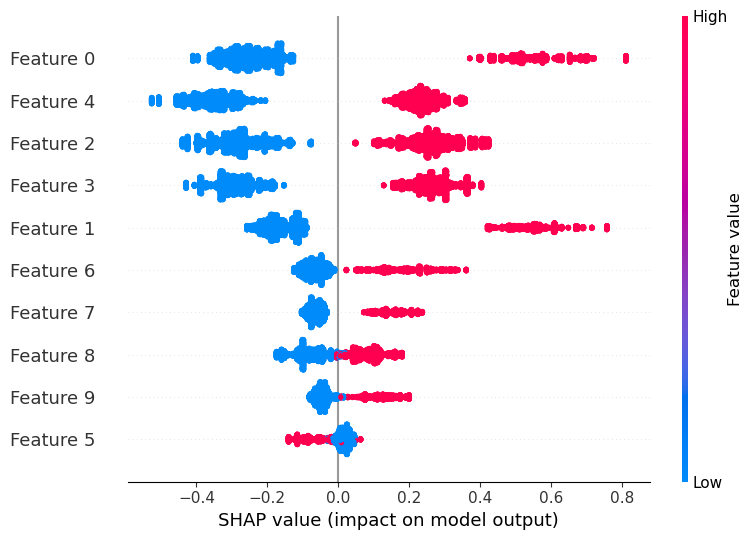

IndexError: invalid index to scalar variable.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import random
from scipy.stats import uniform, randint
import shap  # Import SHAP library

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Step 1: Feature Transformation

# Identify numerical and categorical columns (replace with your actual column names)
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial features
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical features
    ]
)

# Apply the transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 2: Train the LightGBM model on the transformed data
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Get baseline performance (before shuffling)
y_pred = lgb_model.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred)

# Step 3: Calculate permutation importance manually (already done in previous steps)
feature_importances = {}
for feature in range(X_test.shape[1]):
    X_test_shuffled = X_test.copy()
    np.random.shuffle(X_test_shuffled[:, feature])
    y_pred_shuffled = lgb_model.predict(X_test_shuffled)
    shuffled_accuracy = accuracy_score(y_test, y_pred_shuffled)
    importance_score = baseline_accuracy - shuffled_accuracy
    feature_importances[feature] = importance_score

sorted_features_indices = sorted(feature_importances, key=feature_importances.get, reverse=True)

# Step 4: Hyperparameter Tuning using RandomizedSearchCV (already done in previous steps)
param_dist = {
    'n_estimators': randint(50, 500),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 50),
    'max_depth': randint(3, 15),
    'min_child_samples': randint(5, 50),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

tuned_lgb = RandomizedSearchCV(lgb.LGBMClassifier(random_state=42),
                               param_distributions=param_dist,
                               n_iter=30,
                               scoring='accuracy',
                               cv=5,
                               random_state=42,
                               n_jobs=-1)

tuned_lgb.fit(X_train, y_train)

# Step 5: Feature Selection (already done in previous steps)
k = 10  # Adjust this value based on your needs
top_k_features_indices = sorted_features_indices[:k]
X_kbest_train = X_train[:, top_k_features_indices]
X_kbest_test = X_test[:, top_k_features_indices]

# Train a new LightGBM model on these selected features
lgb_model_selected = tuned_lgb.best_estimator_
lgb_model_selected.fit(X_kbest_train, y_train)

# Step 6: Model Interpretation Using SHAP

# Initialize SHAP explainer with the tuned model and training data
explainer = shap.Explainer(lgb_model_selected, X_kbest_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_kbest_test)

# Plot summary of SHAP values to show feature impact on predictions
shap.summary_plot(shap_values, X_kbest_test)

# Optional: Plot a single prediction's SHAP values for deeper insight
shap.initjs()  # Initialize JavaScript visualization in Jupyter notebook if needed
shap.force_plot(explainer.expected_value[1], shap_values[1], X_kbest_test[1])  # Change index to visualize different predictions


100%|===================| 4990/5000 [00:34<00:00]        

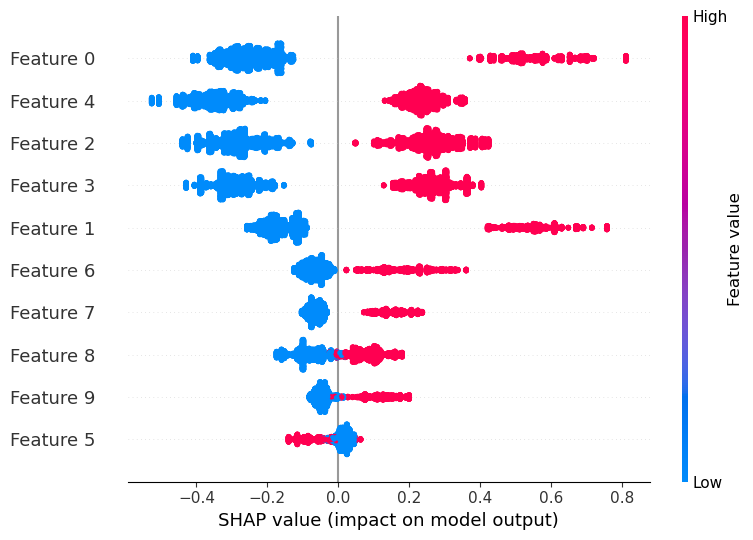

IndexError: invalid index to scalar variable.

In [46]:
import shap  # Ensure you have SHAP installed

# Assuming lgb_model_selected is your tuned LightGBM model
# and shap_values has been calculated for your test set

# Initialize SHAP explainer with the tuned model and training data
explainer = shap.Explainer(lgb_model_selected, X_kbest_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_kbest_test)

# Plot summary of SHAP values to show feature impact on predictions
shap.summary_plot(shap_values, X_kbest_test)

# Optional: Plot a single prediction's SHAP values for deeper insight
shap.initjs()  # Initialize JavaScript visualization in Jupyter notebook if needed

# Change the index to visualize different predictions
# For example, to visualize the first prediction:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_kbest_test[1])

In [47]:
# Define the indices of important features
important_features_indices = [0, 1, 2, 3, 4, 6, 7]  # High importance
moderate_features_indices = [5, 8, 9]                  # Moderate importance

# Combine high and moderate importance features
selected_features_indices = important_features_indices + moderate_features_indices

# Create new training and test sets with only selected features
X_selected_train = X_train[:, selected_features_indices]
X_selected_test = X_test[:, selected_features_indices]

# Train a new LightGBM model on these selected features
lgb_model_refined = lgb.LGBMClassifier()
lgb_model_refined.fit(X_selected_train, y_train)

# Evaluate performance on test set
y_pred_refined = lgb_model_refined.predict(X_selected_test)
y_pred_proba_refined = lgb_model_refined.predict_proba(X_selected_test)[:, 1]

# Calculate performance metrics for the refined model
accuracy_refined = accuracy_score(y_test, y_pred_refined)
precision_refined = precision_score(y_test, y_pred_refined)
recall_refined = recall_score(y_test, y_pred_refined)
f1_refined = f1_score(y_test, y_pred_refined)
roc_auc_refined = roc_auc_score(y_test, y_pred_proba_refined)

# Calculate confusion matrix and specificity for the refined model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_refined).ravel()
specificity_refined = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the refined model
print(f"\nPerformance Metrics with Selected Important Features:")
print(f"Accuracy: {accuracy_refined:.2%}")
print(f"Precision: {precision_refined:.2%}")
print(f"Recall: {recall_refined:.2%}")
print(f"F1 Score: {f1_refined:.2%}")
print(f"AUC-ROC Score: {roc_auc_refined:.2%}")
print(f"Specificity: {specificity_refined:.2%}")

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754

Performance Metrics with Selected Important Features:
Accuracy: 68.54%
Precision: 70.30%
Recall: 89.25%
F1 Score: 78.65%
AUC-ROC Score: 68.00%
Specificity: 30.22%


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Step 1: Feature Transformation (same as before)
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('log_transform', FunctionTransformer(np.log1p, validate=True)),  # Log transformation
            ('poly', PolynomialFeatures(degree=2, include_bias=False))  # Polynomial features
        ]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encoding for categorical features
    ]
)

# Apply the transformations to the features
X_transformed = preprocessor.fit_transform(X)

# Split the transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Step 2: Train Individual Models

# Train LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Step 3: Combine Models Using Voting Classifier with Soft Voting

# Create a voting classifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('lightgbm', lgb_model),
    ('gradient_boosting', gb_model)
], voting='soft')  # Use soft voting

# Fit the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Step 4: Evaluate Performance on Test Set

y_pred_voting = voting_clf.predict(X_test)
y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the ensemble model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

# Calculate confusion matrix and specificity for the ensemble model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_voting).ravel()
specificity_voting = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the ensemble model
print(f"\nPerformance Metrics with Ensemble Method (Soft Voting):")
print(f"Accuracy: {accuracy_voting:.2%}")
print(f"Precision: {precision_voting:.2%}")
print(f"Recall: {recall_voting:.2%}")
print(f"F1 Score: {f1_voting:.2%}")
print(f"AUC-ROC Score: {roc_auc_voting:.2%}")
print(f"Specificity: {specificity_voting:.2%}")

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binar

In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models
base_models = [
    ('lightgbm', lgb.LGBMClassifier()),
    ('gradient_boosting', GradientBoostingClassifier())
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Fit stacking classifier on the training data
stacking_clf.fit(X_train, y_train)

# Evaluate performance on test set
y_pred_stacking = stacking_clf.predict(X_test)
y_pred_proba_stacking = stacking_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)
recall_stacking = recall_score(y_test, y_pred_stacking)
f1_stacking = f1_score(y_test, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y_test, y_pred_proba_stacking)

# Calculate confusion matrix and specificity for the stacking model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stacking).ravel()
specificity_stacking = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the stacking model
print(f"\nPerformance Metrics with Stacking Method:")
print(f"Accuracy: {accuracy_stacking:.2%}")
print(f"Precision: {precision_stacking:.2%}")
print(f"Recall: {recall_stacking:.2%}")
print(f"F1 Score: {f1_stacking:.2%}")
print(f"AUC-ROC Score: {roc_auc_stacking:.2%}")
print(f"Specificity: {specificity_stacking:.2%}")

[LightGBM] [Info] Number of positive: 12663, number of negative: 7337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.633150 -> initscore=0.545754
[LightGBM] [Info] Start training from score 0.545754
[LightGBM] [Info] Number of positive: 10130, number of negative: 5870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 84
[LightGBM] [Info] [binar

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_resampled.value_counts()}")

# Step 3: Train your models on the resampled data
# Train LightGBM model on resampled data
lgb_model_resampled = lgb.LGBMClassifier()
lgb_model_resampled.fit(X_resampled, y_resampled)

# Train Gradient Boosting model on resampled data
gb_model_resampled = GradientBoostingClassifier()
gb_model_resampled.fit(X_resampled, y_resampled)

# Step 4: Combine Models Using Voting Classifier with Soft Voting
voting_clf_resampled = VotingClassifier(estimators=[
    ('lightgbm', lgb_model_resampled),
    ('gradient_boosting', gb_model_resampled)
], voting='soft')

# Fit the voting classifier on the resampled training data
voting_clf_resampled.fit(X_resampled, y_resampled)

# Step 5: Evaluate Performance on Test Set
y_pred_voting_resampled = voting_clf_resampled.predict(X_test)
y_pred_proba_voting_resampled = voting_clf_resampled.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the ensemble model on test set
accuracy_voting_resampled = accuracy_score(y_test, y_pred_voting_resampled)
precision_voting_resampled = precision_score(y_test, y_pred_voting_resampled)
recall_voting_resampled = recall_score(y_test, y_pred_voting_resampled)
f1_voting_resampled = f1_score(y_test, y_pred_voting_resampled)
roc_auc_voting_resampled = roc_auc_score(y_test, y_pred_proba_voting_resampled)

# Calculate confusion matrix and specificity for the ensemble model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_voting_resampled).ravel()
specificity_voting_resampled = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the ensemble model after addressing class imbalance
print(f"\nPerformance Metrics with Resampling (SMOTE):")
print(f"Accuracy: {accuracy_voting_resampled:.2%}")
print(f"Precision: {precision_voting_resampled:.2%}")
print(f"Recall: {recall_voting_resampled:.2%}")
print(f"F1 Score: {f1_voting_resampled:.2%}")
print(f"AUC-ROC Score: {roc_auc_voting_resampled:.2%}")
print(f"Specificity: {specificity_voting_resampled:.2%}")

Original dataset shape: MonkeyPox
1    12663
0     7337
Name: count, dtype: int64
Resampled dataset shape: MonkeyPox
1    12663
0    12663
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 25326, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000564 seconds

In [53]:
# Train LightGBM model with class weights
lgb_model_weighted = lgb.LGBMClassifier(class_weight='balanced')
lgb_model_weighted.fit(X_resampled, y_resampled)

# Train Gradient Boosting model with class weights
gb_model_weighted = GradientBoostingClassifier()
gb_model_weighted.fit(X_resampled, y_resampled)

# Combine Models Using Voting Classifier with Soft Voting
voting_clf_weighted = VotingClassifier(estimators=[
    ('lightgbm', lgb_model_weighted),
    ('gradient_boosting', gb_model_weighted)
], voting='soft')

# Fit the voting classifier on the resampled training data
voting_clf_weighted.fit(X_resampled, y_resampled)

# Evaluate Performance on Test Set
y_pred_voting_weighted = voting_clf_weighted.predict(X_test)
y_pred_proba_voting_weighted = voting_clf_weighted.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the ensemble model after adjusting class weights
accuracy_voting_weighted = accuracy_score(y_test, y_pred_voting_weighted)
precision_voting_weighted = precision_score(y_test, y_pred_voting_weighted)
recall_voting_weighted = recall_score(y_test, y_pred_voting_weighted)
f1_voting_weighted = f1_score(y_test, y_pred_voting_weighted)
roc_auc_voting_weighted = roc_auc_score(y_test, y_pred_proba_voting_weighted)

# Print performance metrics for the weighted ensemble model
print(f"\nPerformance Metrics with Class Weights:")
print(f"Accuracy: {accuracy_voting_weighted:.2%}")
print(f"Precision: {precision_voting_weighted:.2%}")
print(f"Recall: {recall_voting_weighted:.2%}")
print(f"F1 Score: {f1_voting_weighted:.2%}")
print(f"AUC-ROC Score: {roc_auc_voting_weighted:.2%}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 25326, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGB

In [54]:
from imblearn.over_sampling import ADASYN

# Apply ADASYN to the training data
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Verify the new class distribution
print(f"Resampled dataset shape (ADASYN): {y_resampled_adasyn.value_counts()}")

# Train your models on the resampled data
lgb_model_adasyn = lgb.LGBMClassifier()
lgb_model_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

gb_model_adasyn = GradientBoostingClassifier()
gb_model_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

# Combine Models Using Voting Classifier with Soft Voting
voting_clf_adasyn = VotingClassifier(estimators=[
    ('lightgbm', lgb_model_adasyn),
    ('gradient_boosting', gb_model_adasyn)
], voting='soft')

# Fit the voting classifier on the resampled training data
voting_clf_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

# Evaluate Performance on Test Set
y_pred_voting_adasyn = voting_clf_adasyn.predict(X_test)
y_pred_proba_voting_adasyn = voting_clf_adasyn.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the ensemble model after applying ADASYN
accuracy_voting_adasyn = accuracy_score(y_test, y_pred_voting_adasyn)
precision_voting_adasyn = precision_score(y_test, y_pred_voting_adasyn)
recall_voting_adasyn = recall_score(y_test, y_pred_voting_adasyn)
f1_voting_adasyn = f1_score(y_test, y_pred_voting_adasyn)
roc_auc_voting_adasyn = roc_auc_score(y_test, y_pred_proba_voting_adasyn)

# Print performance metrics for the ensemble model after applying ADASYN
print(f"\nPerformance Metrics with ADASYN Resampling:")
print(f"Accuracy: {accuracy_voting_adasyn:.2%}")
print(f"Precision: {precision_voting_adasyn:.2%}")
print(f"Recall: {recall_voting_adasyn:.2%}")
print(f"F1 Score: {f1_voting_adasyn:.2%}")
print(f"AUC-ROC Score: {roc_auc_voting_adasyn:.2%}")

Resampled dataset shape (ADASYN): MonkeyPox
0    12740
1    12663
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 25403, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498484 -> initscore=-0.006062
[LightGBM] [Info] Start training from score -0.006062
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12740
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `for

In [55]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampling to the training data
ros = RandomOverSampler(random_state=42)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)

# Verify the new class distribution
print(f"Resampled dataset shape (Random Oversampling): {y_resampled_ros.value_counts()}")

# Train your models on the resampled data
lgb_model_ros = lgb.LGBMClassifier()
lgb_model_ros.fit(X_resampled_ros, y_resampled_ros)

gb_model_ros = GradientBoostingClassifier()
gb_model_ros.fit(X_resampled_ros, y_resampled_ros)

# Combine Models Using Voting Classifier with Soft Voting
voting_clf_ros = VotingClassifier(estimators=[
    ('lightgbm', lgb_model_ros),
    ('gradient_boosting', gb_model_ros)
], voting='soft')

# Fit the voting classifier on the resampled training data
voting_clf_ros.fit(X_resampled_ros, y_resampled_ros)

# Evaluate Performance on Test Set
y_pred_voting_ros = voting_clf_ros.predict(X_test)
y_pred_proba_voting_ros = voting_clf_ros.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the ensemble model after applying random oversampling
accuracy_voting_ros = accuracy_score(y_test, y_pred_voting_ros)
precision_voting_ros = precision_score(y_test, y_pred_voting_ros)
recall_voting_ros = recall_score(y_test, y_pred_voting_ros)
f1_voting_ros = f1_score(y_test, y_pred_voting_ros)
roc_auc_voting_ros = roc_auc_score(y_test, y_pred_proba_voting_ros)

# Print performance metrics for the ensemble model after applying random oversampling
print(f"\nPerformance Metrics with Random Oversampling:")
print(f"Accuracy: {accuracy_voting_ros:.2%}")
print(f"Precision: {precision_voting_ros:.2%}")
print(f"Recall: {recall_voting_ros:.2%}")
print(f"F1 Score: {f1_voting_ros:.2%}")
print(f"AUC-ROC Score: {roc_auc_voting_ros:.2%}")

Resampled dataset shape (Random Oversampling): MonkeyPox
1    12663
0    12663
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 25326, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12663, number of negative: 12663
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import ADASYN
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'data' is your dataframe
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your target column
y = data['MonkeyPox']

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply ADASYN to the training data to handle class imbalance
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Verify the new class distribution
print(f"Resampled dataset shape (ADASYN): {y_resampled.value_counts()}")

# Step 3: Calculate class weights for Gradient Boosting
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights_dict = dict(zip(np.unique(y_resampled), class_weights))

# Step 4: Define models and their hyperparameters for tuning
lgb_model = lgb.LGBMClassifier()
gb_model = GradientBoostingClassifier()

# Define hyperparameter distributions for RandomizedSearchCV
param_dist_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [3, 5, 7]
}

param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}

# Step 5: Hyperparameter tuning for LightGBM using RandomizedSearchCV
lgb_search = RandomizedSearchCV(lgb_model, param_distributions=param_dist_lgb,
                                 n_iter=10, scoring='accuracy', cv=5,
                                 random_state=42)
lgb_search.fit(X_resampled, y_resampled)

# Step 6: Hyperparameter tuning for Gradient Boosting using RandomizedSearchCV (with sample weights)
gb_search = RandomizedSearchCV(gb_model, param_distributions=param_dist_gb,
                               n_iter=10, scoring='accuracy', cv=5,
                               random_state=42)
gb_search.fit(X_resampled, y_resampled) # Note: Sample weights are not used here

# Step 7: Combine Models Using Voting Classifier with Soft Voting
voting_clf = VotingClassifier(estimators=[
    ('lightgbm', lgb_search.best_estimator_),
    ('gradient_boosting', gb_search.best_estimator_)
], voting='soft')

# Fit the voting classifier on the resampled training data with sample weights for GB (if needed)
voting_clf.fit(X_resampled, y_resampled)

# Step 8: Evaluate Performance on Test Set
y_pred_voting = voting_clf.predict(X_test)
y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

# Calculate performance metrics for the ensemble model after applying ADASYN and tuning
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)
recall_voting = recall_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, y_pred_proba_voting)

# Calculate confusion matrix and specificity for the ensemble model
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_voting).ravel()
specificity_voting = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics for the ensemble model after applying ADASYN and tuning
print(f"\nPerformance Metrics with ADASYN Resampling and Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_voting:.2%}")
print(f"Precision: {precision_voting:.2%}")
print(f"Recall: {recall_voting:.2%}")
print(f"F1 Score: {f1_voting:.2%}")
print(f"AUC-ROC Score: {roc_auc_voting:.2%}")
print(f"Specificity: {specificity_voting:.2%}")

Resampled dataset shape (ADASYN): MonkeyPox
0    12740
1    12663
Name: count, dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10130, number of negative: 10192
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 20322, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498475 -> initscore=-0.006102
[LightGBM] [Info] Start training from score -0.006102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

selected_features = ['Rectal Pain', 'HIV Infection', 'Systemic Illness_Swollen Lymph Nodes',
                     'Sexually Transmitted Infection', 'Systemic Illness_Fever', 
                     'Systemic Illness_Muscle Aches and Pain', 'Oral Lesions', 'Sore Throat', 
                     'Systemic Illness_Unknown', 'Penile Oedema', 'Swollen Tonsils']

X = data[selected_features]
y = data['MonkeyPox']


# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Build the ANN model
model = Sequential()
model.add(Dense(96, activation='relu', input_shape=(X_train.shape[1],)))  # Layer 1 with 96 units
model.add(Dense(64, activation='relu'))                                   # Layer 2 with 64 units
model.add(Dense(1, activation='sigmoid'))                                # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Predictions and performance metrics
y_pred_prob = model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Classification report for precision, recall and F1 score
report = classification_report(y_val, y_pred)
print("Classification Report:\n", report)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc:.4f}")

# Confusion Matrix to calculate specificity and other metrics
conf_matrix = confusion_matrix(y_val, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate additional metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

# Print performance metrics
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")


Epoch 1/50
625/625 [==============================] - 2s 2ms/step - loss: 0.6043 - accuracy: 0.6780 - val_loss: 0.5900 - val_accuracy: 0.6968
Epoch 2/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5966 - accuracy: 0.6863 - val_loss: 0.5852 - val_accuracy: 0.7014
Epoch 3/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5955 - accuracy: 0.6889 - val_loss: 0.5866 - val_accuracy: 0.6996
Epoch 4/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5949 - accuracy: 0.6879 - val_loss: 0.5897 - val_accuracy: 0.6984
Epoch 5/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5937 - accuracy: 0.6898 - val_loss: 0.5847 - val_accuracy: 0.7030
Epoch 6/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5934 - accuracy: 0.6888 - val_loss: 0.5857 - val_accuracy: 0.7010
Epoch 7/50
625/625 [==============================] - 1s 2ms/step - loss: 0.5925 - accuracy: 0.6892 - val_loss: 0.5855 - val_accuracy: 0.7036
Epoch 

In [ ]:
# ANN for selected features 

In [19]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Step 2: Load and prepare your dataset
selected_features = ['Rectal Pain', 'HIV Infection', 'Systemic Illness_Swollen Lymph Nodes',
                     'Sexually Transmitted Infection', 'Systemic Illness_Fever', 
                     'Systemic Illness_Muscle Aches and Pain', 'Oral Lesions', 'Sore Throat', 
                     'Systemic Illness_Unknown', 'Penile Oedema', 'Swollen Tonsils']

X = data[selected_features]
y = data['MonkeyPox']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Define the model builder function for Keras Tuner
def model_builder(hp):
    model = keras.Sequential()
    
    # Tune the number of hidden layers (1 to 7)
    for i in range(hp.Int('num_layers', 1, 7)):
        # Tune the number of units in each hidden layer (16 to 256)
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                                     activation='relu'))
    
    # Output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Step 4: Initialize Keras Tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='tuning_ann'
)

# Step 5: Perform hyperparameter search
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Step 6: Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Step 7: Print the optimal number of layers and units in each layer
print(f"""
The hyperparameter search is complete.
Optimal number of layers: {best_hps.get('num_layers')}
Optimal number of units in each layer: 
""")
for i in range(best_hps.get('num_layers')):
    print(f"Layer {i+1}: {best_hps.get('units_' + str(i))} units")

# Step 8: Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Step 9: Evaluate the model on the test data
y_pred = best_model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

# Step 10: Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion matrix to calculate specificity
conf_matrix = confusion_matrix(y_test, y_pred_class)
tn, fp, fn, tp = conf_matrix.ravel()

# Specificity calculation
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print performance metrics
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")


Trial 90 Complete [00h 00m 10s]
val_accuracy: 0.703000009059906

Best val_accuracy So Far: 0.7085000276565552
Total elapsed time: 00h 13m 11s

The hyperparameter search is complete.
Optimal number of layers: 1
Optimal number of units in each layer: 

Layer 1: 32 units
Epoch 1/50
500/500 [==============================] - 1s 2ms/step - loss: 0.6097 - accuracy: 0.6767 - val_loss: 0.5884 - val_accuracy: 0.7028
Epoch 2/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6032 - accuracy: 0.6829 - val_loss: 0.5906 - val_accuracy: 0.7017
Epoch 3/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6013 - accuracy: 0.6804 - val_loss: 0.5904 - val_accuracy: 0.6973
Epoch 4/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.6837 - val_loss: 0.5878 - val_accuracy: 0.7057
Epoch 5/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6012 - accuracy: 0.6817 - val_loss: 0.5941 - val_accuracy: 0.7038
Epoch 6/50
500/500 [=